In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./WHR_2023.csv")
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [2]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898
std,1.139929,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.724000,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000
50%,5.684000,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000
75%,6.334000,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000


Гістограми та щільності розподілення атрибутів:

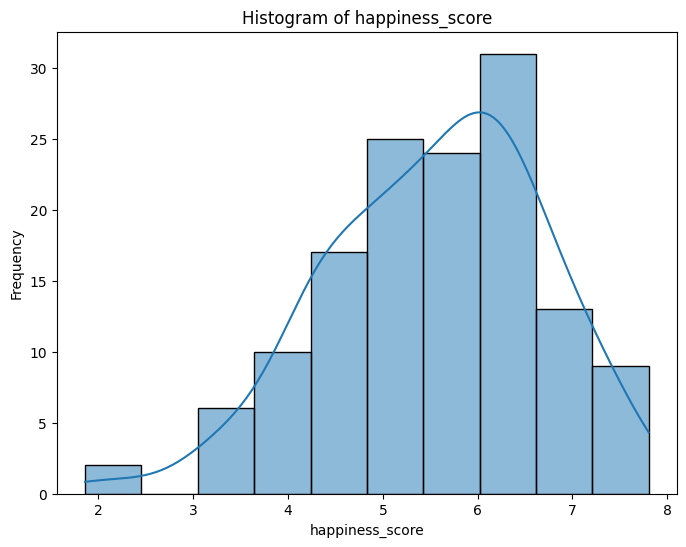

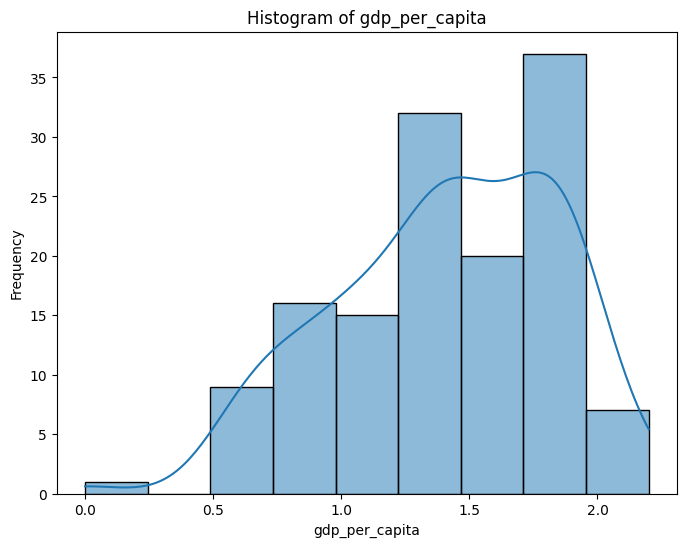

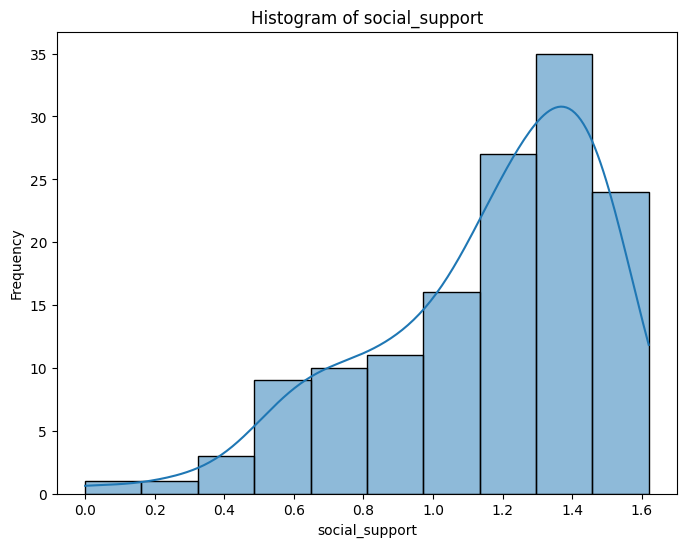

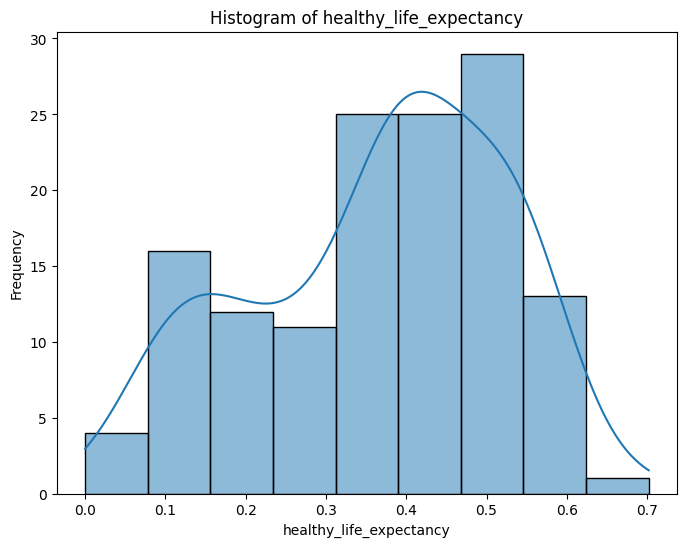

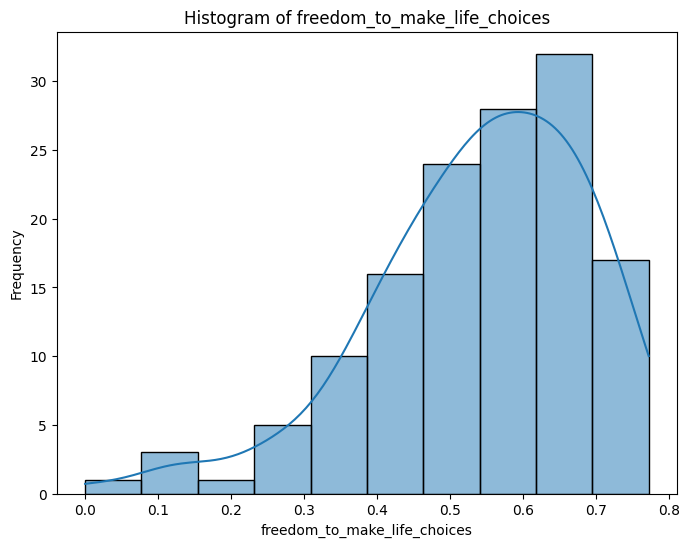

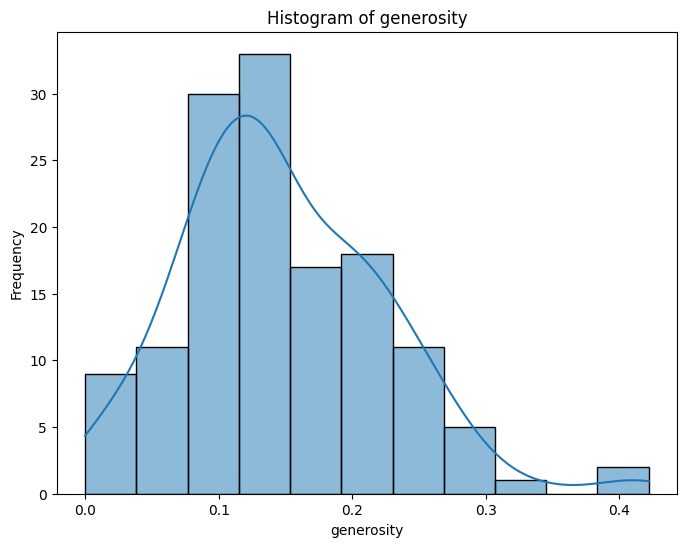

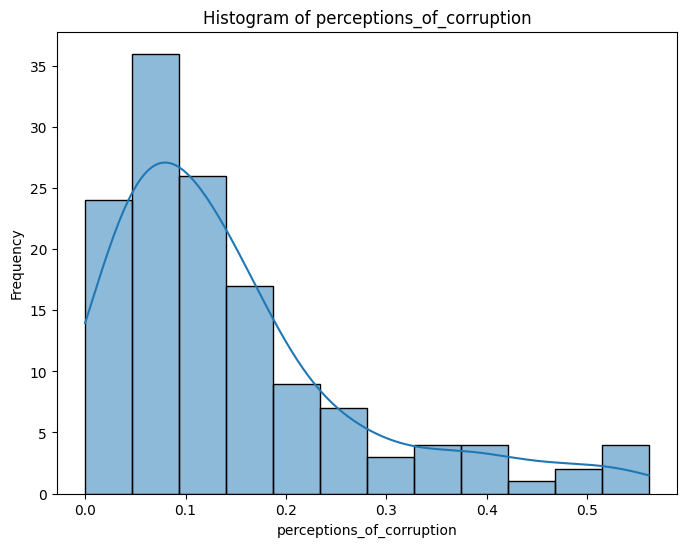

In [3]:
features = ['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

Віскерні графіки атрибутів:

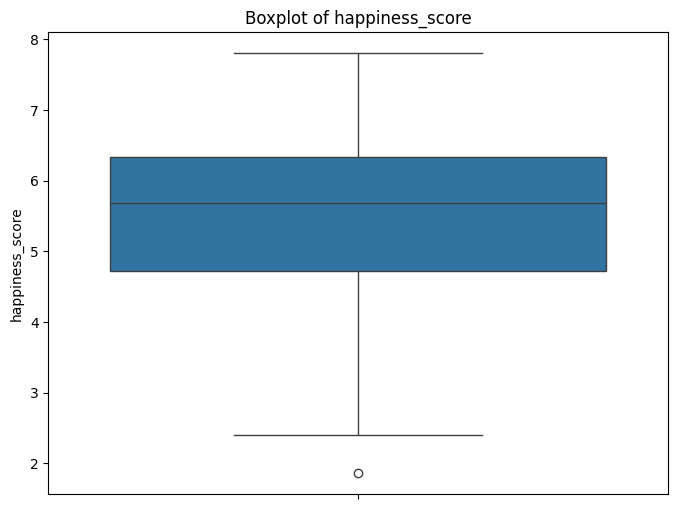

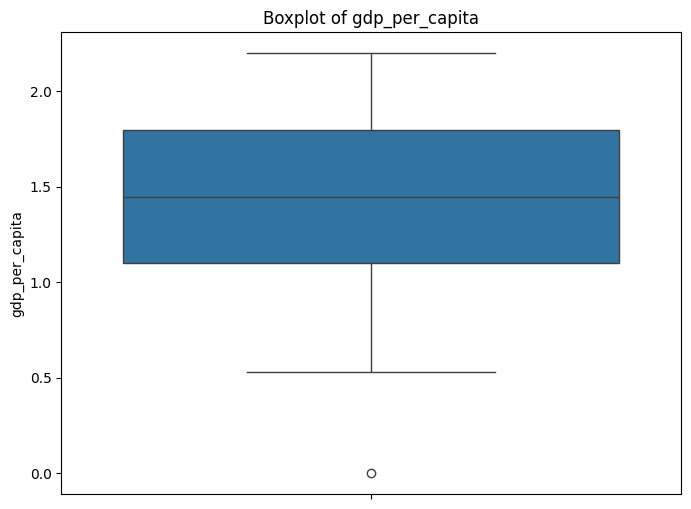

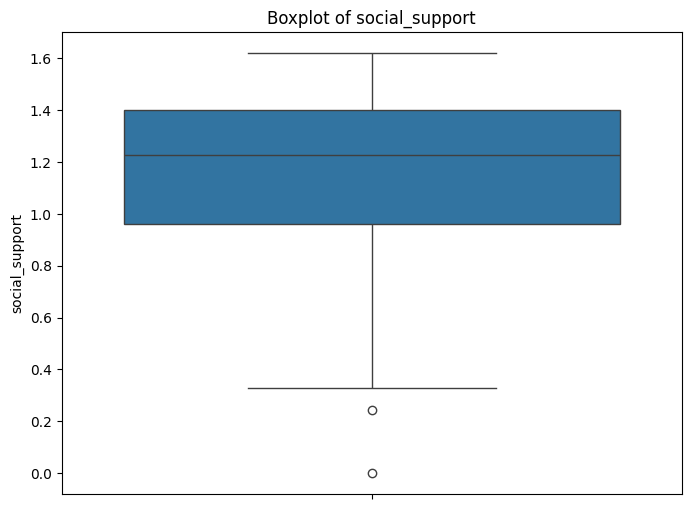

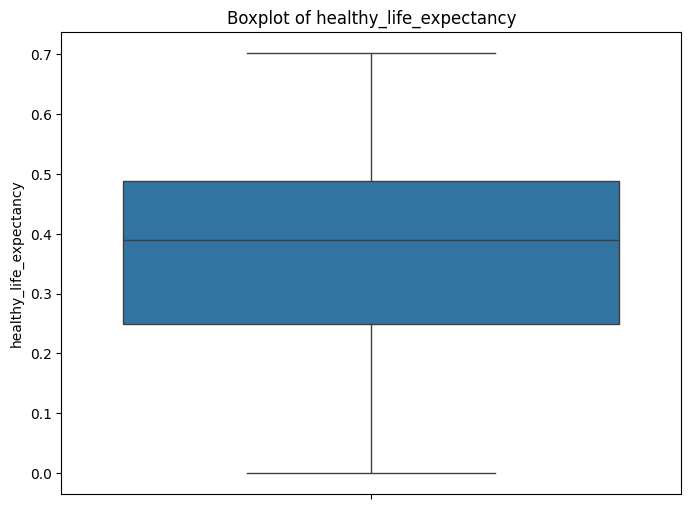

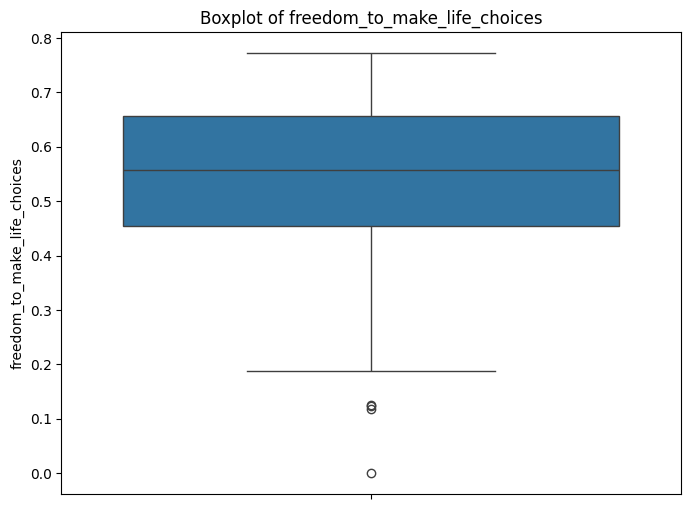

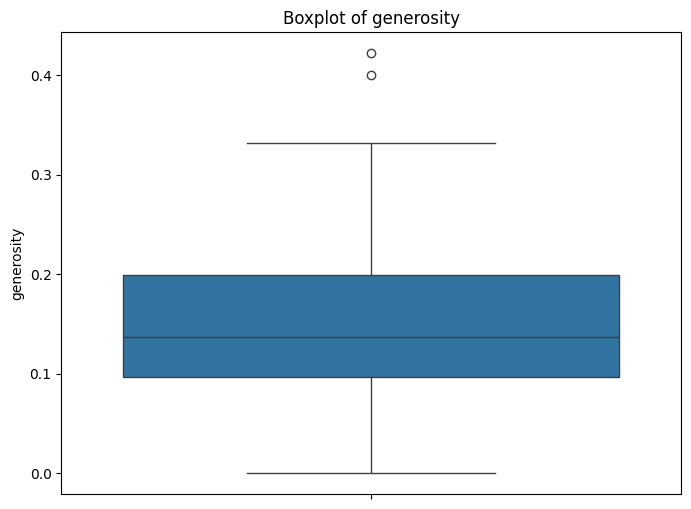

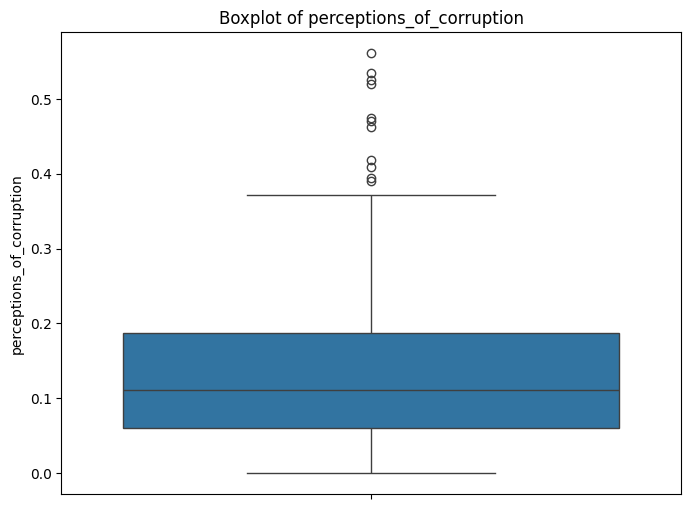

In [4]:
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()


Кореляційна матриця атрибутів:

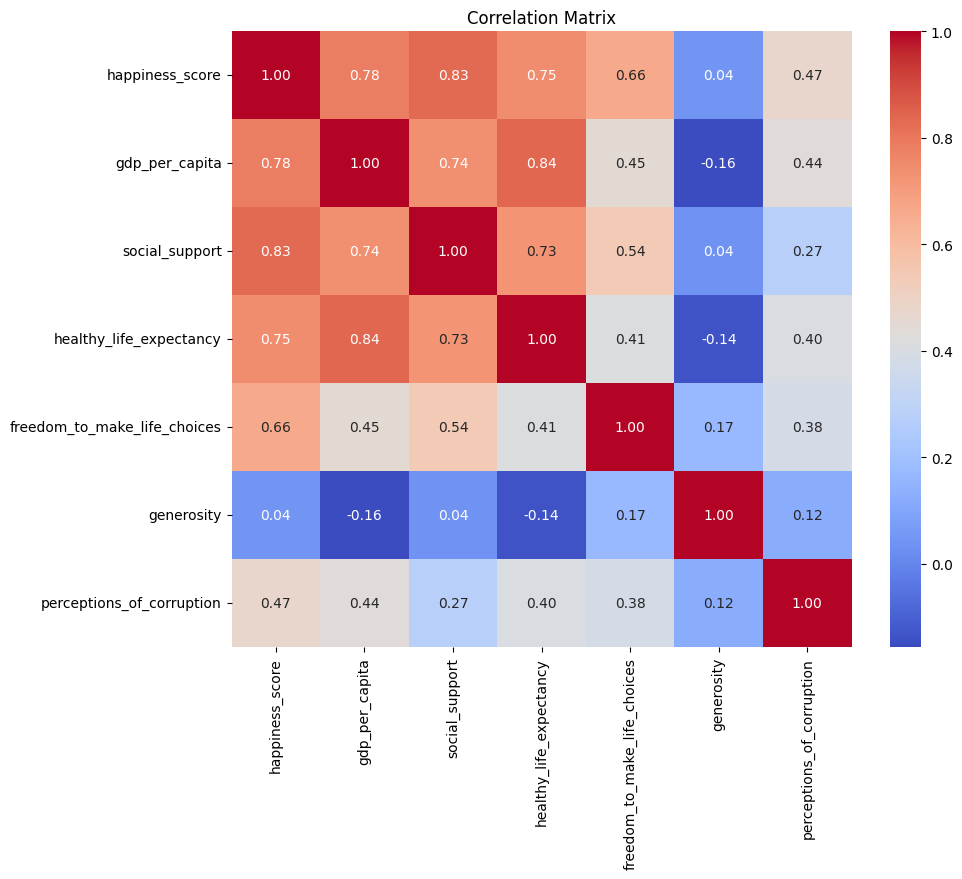

In [5]:
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Класифікація країн на категорії щасливості може бути виконана через визначення категорій щасливості:

Спочатку потрібно визначити критерії для класифікації країн на категорії щасливості. Наприклад:
    Висока щасливість: happiness_score від 7.0 до 10.0.
    Середня щасливість: happiness_score від 5.0 до 6.9.
    Низька щасливість: happiness_score від 0.0 до 4.9.

In [6]:
def categorize_happiness(score):
    if score >= 7.0:
        return 'Висока'
    elif 5.0 <= score < 7.0:
        return 'Середня'
    else:
        return 'Низька'

df['happiness_category'] = df['happiness_score'].apply(categorize_happiness)



Після додавання стовпця з категоріями щасливості, можна аналізувати розподіл країн за категоріями.

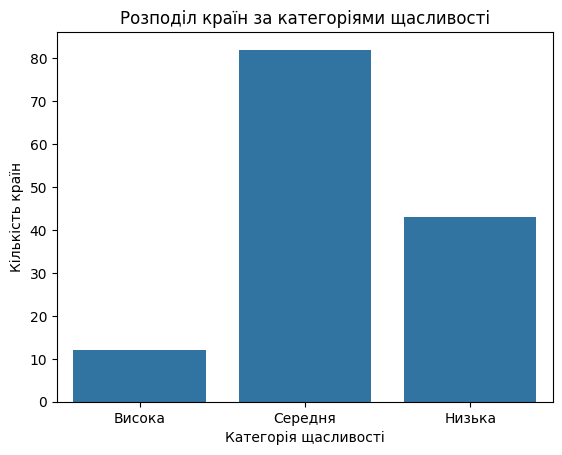

In [7]:
sns.countplot(data=df, x='happiness_category')
plt.title('Розподіл країн за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('Кількість країн')
plt.show()


Цей підхід допоможе класифікувати країни на категорії щасливості на основі їх рейтингу щасливості (happiness_score) та аналізувати розподіл країн у цих категоріях. Наші обрані ознаки це gdp_per_capita, healthy_life_expectancy,social_support

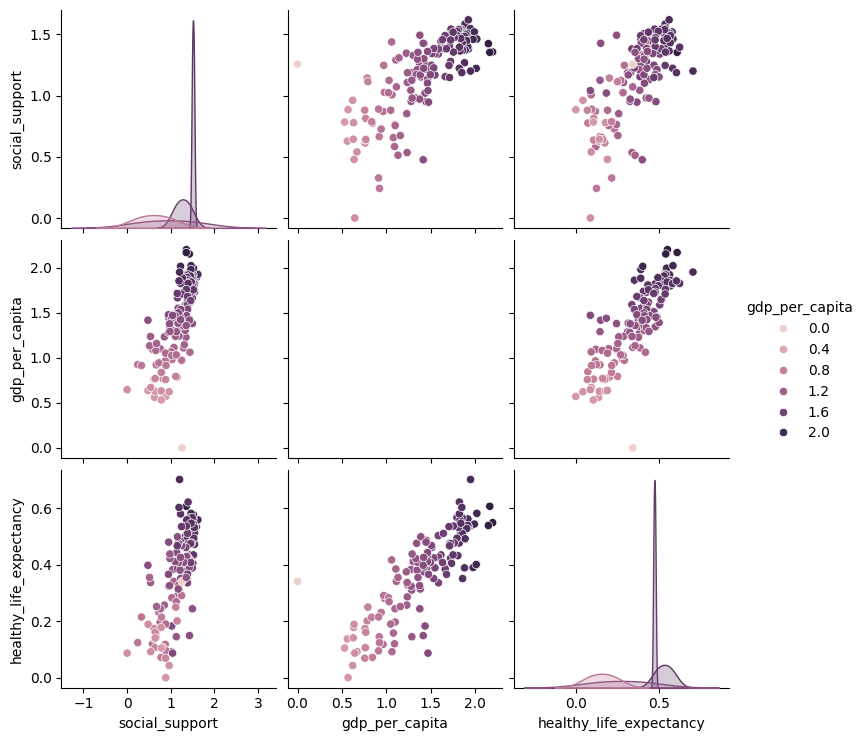

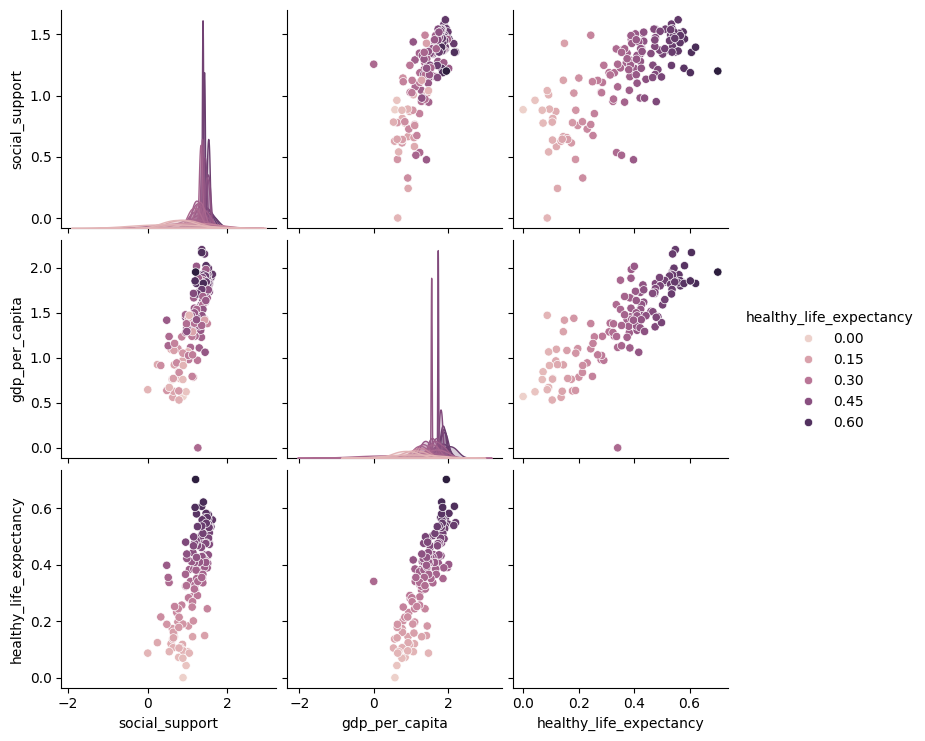

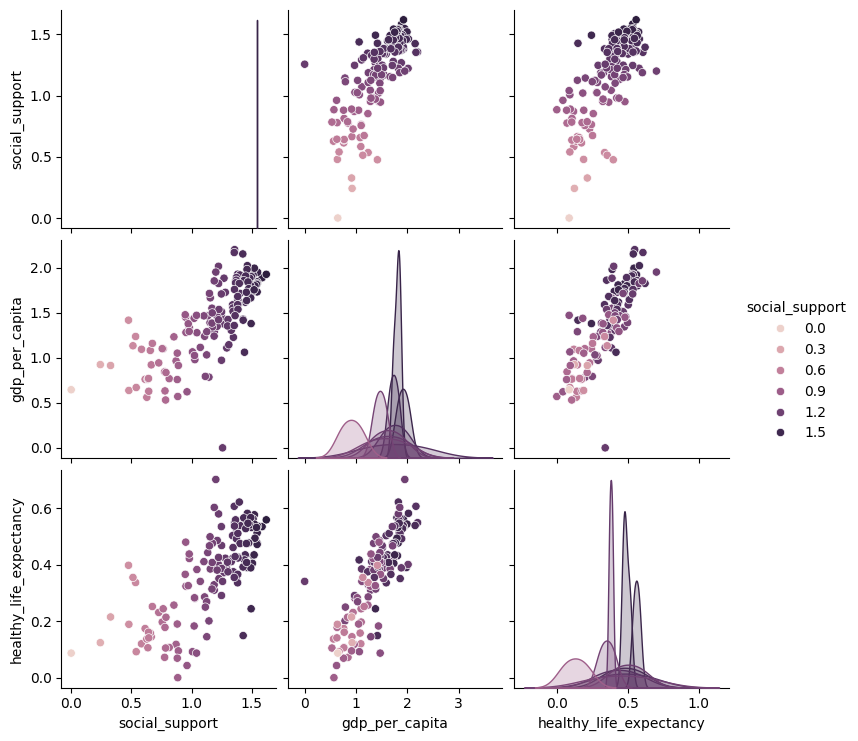

In [8]:
sns.pairplot(df, hue='gdp_per_capita', vars=['social_support', 'gdp_per_capita', 'healthy_life_expectancy'])
sns.pairplot(df, hue='healthy_life_expectancy', vars=['social_support', 'gdp_per_capita', 'healthy_life_expectancy'])
sns.pairplot(df, hue='social_support', vars=['social_support', 'gdp_per_capita', 'healthy_life_expectancy'])

Якщо на графіках видно, що класи добре розділяються за допомогою цих ознак, це свідчить про їхню інформативність.

Віскерні функції ознак для аналізу їх розподілу між класами:

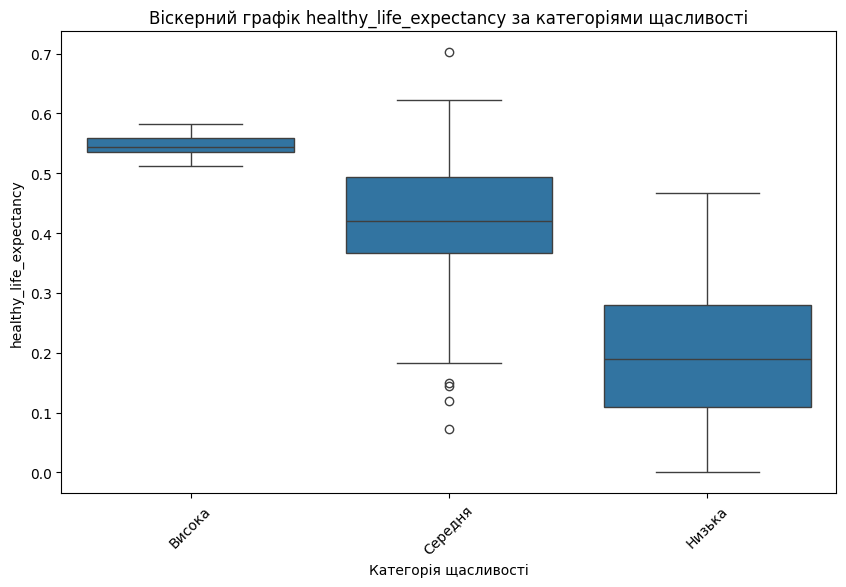

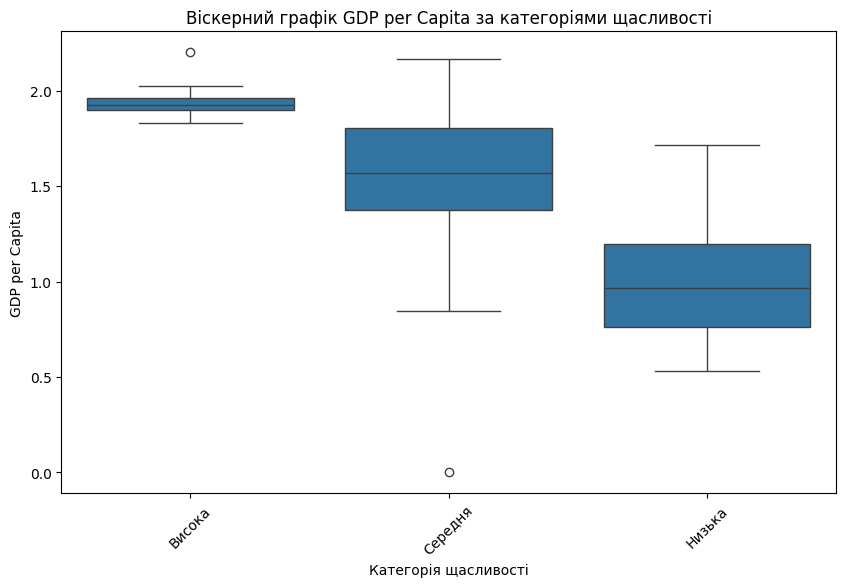

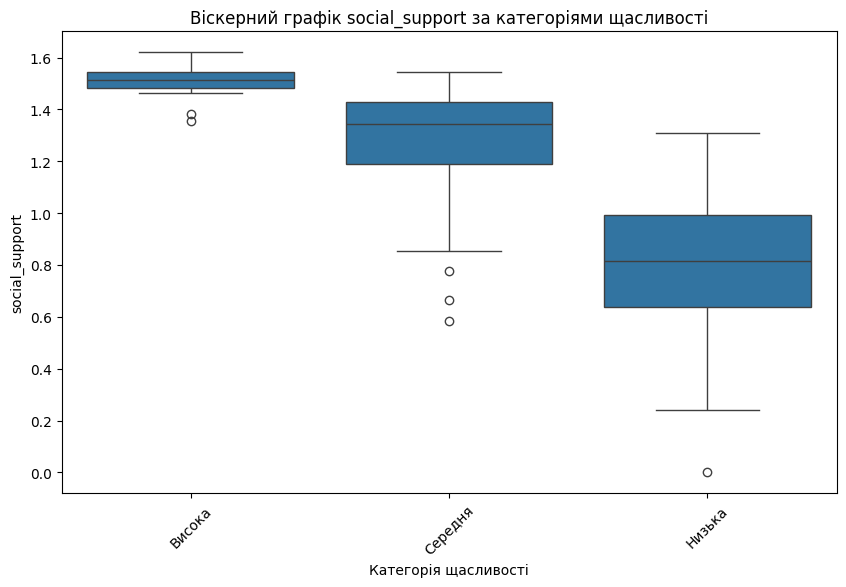

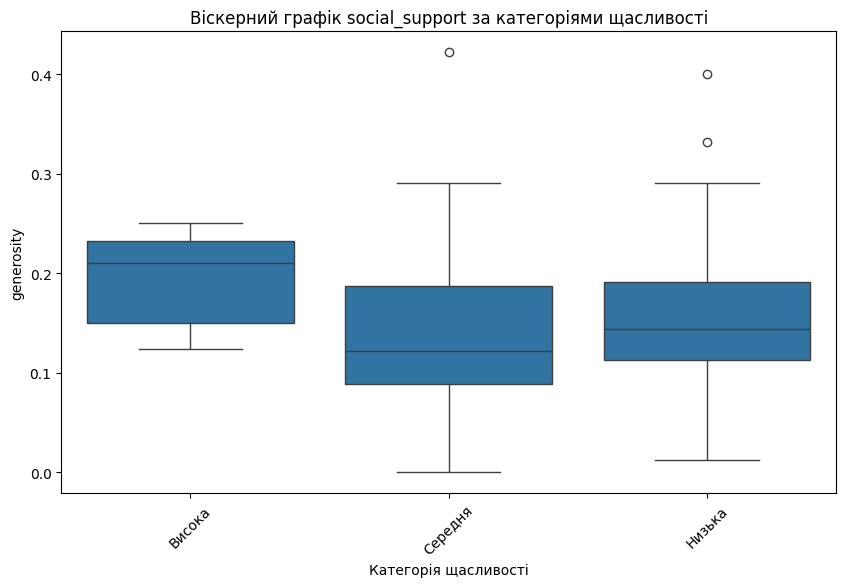

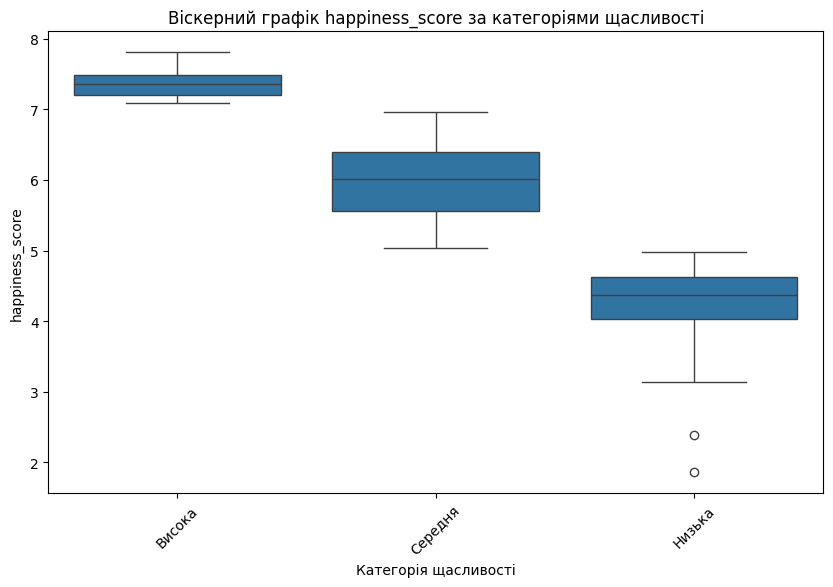

In [9]:
#healthy_life_expectancy'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='healthy_life_expectancy')
plt.title('Віскерний графік healthy_life_expectancy за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('healthy_life_expectancy')
plt.xticks(rotation=45)
plt.show()
#'gdp_per_capita'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='gdp_per_capita')
plt.title('Віскерний графік GDP per Capita за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('GDP per Capita')
plt.xticks(rotation=45)
plt.show()
#'social_support'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='social_support')
plt.title('Віскерний графік social_support за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('social_support')
plt.xticks(rotation=45)
plt.show()

#'generosity'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='generosity')
plt.title('Віскерний графік social_support за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('generosity')
plt.xticks(rotation=45)
plt.show()

#'happiness_score'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='happiness_score')
plt.title('Віскерний графік happiness_score за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('happiness_score')
plt.xticks(rotation=45)
plt.show()

Збудувати модель машинного навчання методом дерев рішень;

Візуалізувати отриману модель.

Визначити показники якості збудованої моделі;

In [10]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,happiness_category
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535,Висока
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525,Висока
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187,Висока
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158,Висока
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394,Висока


In [11]:
from sklearn import tree
X= df[['healthy_life_expectancy']]
y =df[['happiness_category']]
#X
#y
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5294117647058824, 0.9444444444444444, 'x[0] <= 0.285\nentropy = 1.276\nsamples = 137\nvalue = [12, 43, 82]'),
 Text(0.29411764705882354, 0.8333333333333334, 'x[0] <= 0.119\nentropy = 0.712\nsamples = 41\nvalue = [0, 33, 8]'),
 Text(0.17647058823529413, 0.7222222222222222, 'x[0] <= 0.079\nentropy = 0.371\nsamples = 14\nvalue = [0, 13, 1]'),
 Text(0.11764705882352941, 0.6111111111111112, 'x[0] <= 0.056\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(0.058823529411764705, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.17647058823529413, 0.5, 'x[0] <= 0.07\nentropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.11764705882352941, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.23529411764705882, 0.3888888888888889, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.23529411764705882, 0.6111111111111112, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.4117647058823529, 0.7222222222222222, 'x[0] <= 0.122\nen

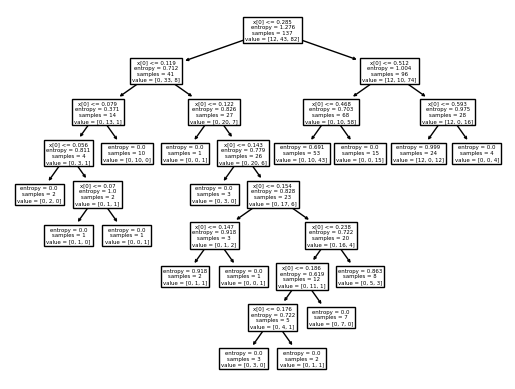

In [12]:
tree.plot_tree(model)

In [13]:
model.score(X,y)

0.8029197080291971

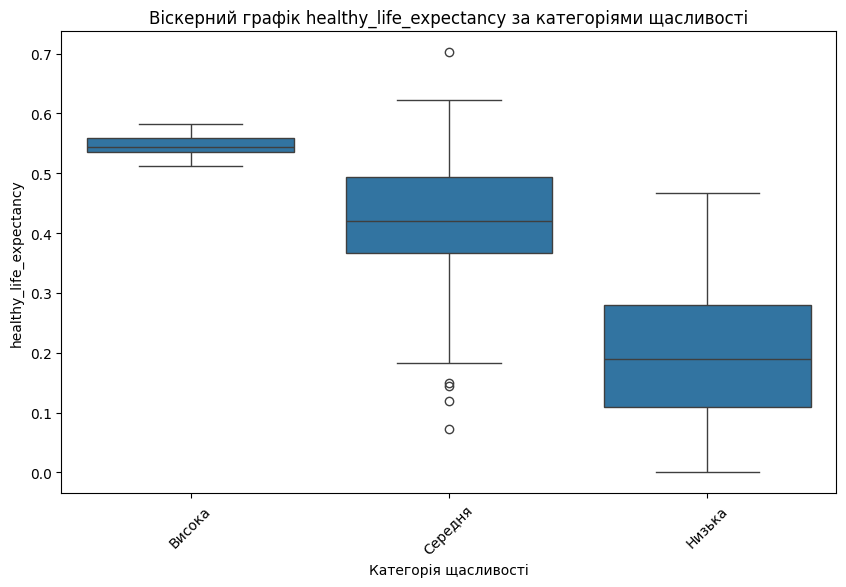

In [14]:
#healthy_life_expectancy'
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='happiness_category', y='healthy_life_expectancy')
plt.title('Віскерний графік healthy_life_expectancy за категоріями щасливості')
plt.xlabel('Категорія щасливості')
plt.ylabel('healthy_life_expectancy')
plt.xticks(rotation=45)
plt.show()

In [15]:
model.predict([[0.55]])

/home/cherrypix/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Висока'], dtype=object)

In [16]:
X= df[['healthy_life_expectancy','social_support','gdp_per_capita']]
y =df[['happiness_category']]
#X
#y
model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

[Text(0.4411764705882353, 0.9583333333333334, 'x[1] <= 1.15\nentropy = 1.276\nsamples = 137\nvalue = [12, 43, 82]'),
 Text(0.17647058823529413, 0.875, 'x[2] <= 0.84\nentropy = 0.772\nsamples = 53\nvalue = [0, 41, 12]'),
 Text(0.11764705882352941, 0.7916666666666666, 'entropy = 0.0\nsamples = 17\nvalue = [0, 17, 0]'),
 Text(0.23529411764705882, 0.7916666666666666, 'x[1] <= 0.56\nentropy = 0.918\nsamples = 36\nvalue = [0, 24, 12]'),
 Text(0.17647058823529413, 0.7083333333333334, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.29411764705882354, 0.7083333333333334, 'x[2] <= 0.879\nentropy = 0.963\nsamples = 31\nvalue = [0, 19, 12]'),
 Text(0.23529411764705882, 0.625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.35294117647058826, 0.625, 'x[0] <= 0.119\nentropy = 0.948\nsamples = 30\nvalue = [0, 19, 11]'),
 Text(0.29411764705882354, 0.5416666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.4117647058823529, 0.5416666666666666, 'x[2] <= 1.407\nentr

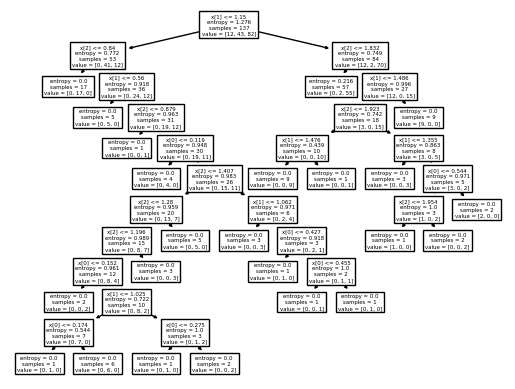

In [17]:
tree.plot_tree(model)

In [24]:
model.score(X,y)

0.9854014598540146

Збудувати модель машинного навчання методом KNN;

Візуалізувати отриману модель.

Визначити показники якості збудованої моделі;

Порівняти показники якості моделі машинного навчання

Зробити висновки по роботі.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
X = X.fillna(0.36)
knn.fit(X,y)

/home/cherrypix/.local/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [20]:
knn.score(X,y)

0.8467153284671532

In [21]:
results = knn.predict(X)
results

array(['Висока', 'Висока', 'Висока', 'Висока', 'Висока', 'Висока',
       'Висока', 'Висока', 'Висока', 'Висока', 'Висока', 'Висока',
       'Висока', 'Висока', 'Середня', 'Висока', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Висока', 'Середня', 'Середня',
       'Висока', 'Середня', 'Середня', 'Середня', 'Середня', 'Середня',
       'Середня', 'Висока', 'Середня', 'Середня', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Низька', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Середня', 'Середня', 'Середня',
       'Низька', 'Низька', 'Середня', 'Середня', 'Низька', 'Середня',
       'Низька', 'Середня', 'Середня', 'Середня', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Середня', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Середня', 'Середня', 'Середня',
       'Середня', 'Середня', 'Середня', 'Середня', 'Середня', 'Низька',
       'Низька', 'Низька', 'Середня', 'Середня', 'Середня', 'Середня',
    

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
X = df[['healthy_life_expectancy', 'social_support','gdp_per_capita']].fillna(0.36)
knn.fit(X,y)
knn.score(X,y)

/home/cherrypix/.local/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8759124087591241